In [1]:
"""
A script to convert the drosophila connectome into SpineML 

This build upon the pure data to add in the required infered network components:

# Install libSpineML from source
# https://github.com/AdamRTomkins/libSpineML

"""
from __future__ import division

from libSpineML import smlExperiment as exp
from libSpineML import smlNetwork as net
from libSpineML import smlComponent as com
from libSpineML.smlUtils import  create_spineml_network
from libSpineML.smlUtils import  process_connection_json

from libSpineML.smlUtils import  extract_adjacency_matrix
from libSpineML.smlUtils import  inject_adjacency_matrix
from libSpineML.smlUtils import set_esn_weights

from matplotlib import pyplot as plt

import csv
import sys

import cStringIO
import graphviz as gv
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import copy


def main(connection_json,lpu_dict):
    """ Process the parameter files and create a SpineML network """

    neurons, populations, projections = process_connection_json(connections_json,lpu_dict,neuron_params = None) 
    print "Creating SpineML representation..."
    create_spineml_network(neurons, populations,
        projections,output_filename='network.xml',project_name= 'drosophila')
  




In [2]:
import pickle
lpu_dict = pickle.load(( open( "spineml/lpu_dicts.p", "rb" ) ))
connections_json = pickle.load(( open( "spineml/example_connections_json.p", "rb" ) ))


In [3]:
neurons, populations, projections = process_connection_json(connections_json,lpu_dict,neuron_params = None) 
print "Creating SpineML representation..."

create_spineml_network(neurons, populations,
projections,output_filename='network.xml',project_name= 'drosophila')

print "done"

Creating SpineML representation...
done


# Build an ESN implementation

We can pass in a custom neuron parameters dictionary to specify the ESN network components


In [4]:
neuron_params = {'mem_model':
                            {'name':'ESNNode', 'filename':'ESNNode.xml'},
                         'weight_update' :
                            {'name':'ESNWeight', 'filename':'ESNWeight.xml','override':{}},
                         'synapse' :
                            {'name':'ESNConnection', 'filename':'ESNConnection.xml'}
                        }

In [5]:
neurons, populations, projections = process_connection_json(connections_json,lpu_dict,neuron_params = neuron_params) 
print "Creating SpineML representation..."

create_spineml_network(neurons, populations,
projections,output_filename='ESN_files/esn_network.xml',project_name= 'drosophila')

print "done"

Creating SpineML representation...
done


# Overwrite Weights 

In [6]:
adjacency_matrix, neuron_index = extract_adjacency_matrix(populations,projections)  

In [7]:

rand_matrix = adjacency_matrix* np.random.rand(adjacency_matrix.shape[0],adjacency_matrix.shape[1])

populations_rand,projections_rand = inject_adjacency_matrix( populations,projections, rand_matrix, neuron_index, weight_parameter='w') 

adjacency_matrix_rand, _ = extract_adjacency_matrix(populations_rand,projections_rand,weight_parameter='w')  

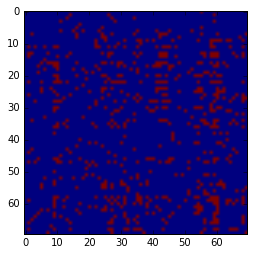

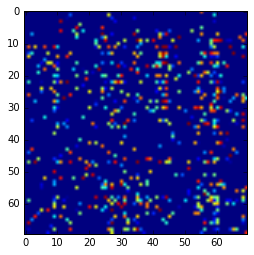

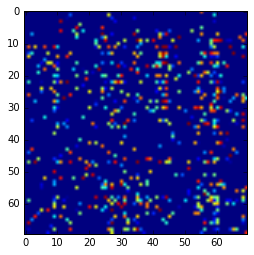

In [10]:
plt.imshow(adjacency_matrix)
plt.show()
plt.imshow(rand_matrix)
plt.show()
plt.imshow(adjacency_matrix_rand)
plt.show()

In [14]:
spectral_radius=1.0
populations,projections,adjacency_matrix = set_esn_weights(populations,projections, weight_parameter='w')

In [15]:
radius = np.max(np.abs(np.linalg.eigvals(adjacency_matrix)))
print radius

0.999999999999995
